# 8장. 텍스트빈도분석 - 1.영어단어분석

### 영어 단어 분석에 필요한 패키지 준비

In [1]:
!pip install matplotlib  
#최초 한번만 설치:Anaconda에 설치됨

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install wordcloud  
#최초 한번만 설치:Anaconda에 설치됨

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   ---------------------------------------- 301.4/301.4 kB 6.2 MB/s eta 0:00:00


In [3]:
!pip install nltk
# miniconda 설치필요

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------  1.5/1.5 MB 48.2 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 31.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/268.9 kB ? eta -:--:--
   --------------------------------------- 268.9/268.9 kB 17.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/97.9 kB ? eta -:--:--
   ---------------------------------------- 97.9/97.9 kB 5.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   --------------------------------------- 301.2/301.2 kB 18.2 MB/s eta 0:00:00


In [4]:
!pip install pandas
import pandas as pd
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

Defaulting to user installation because normal site-packages is not writeable


####    최초 한번은 nltk의 리소스를 다운로드 받아야함.

In [5]:
import nltk     
# nltk.download() 를 하기위해, import 함.

In [20]:
nltk.download()  # 최초 한번만 설치: download 창이 뜨면, 모두 선택하고 [Download] 버튼 클릭!

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# 1. 데이터 준비

### 1-1. 파일 병합

### - ☺데이터를 다운 받은 시점에 따라 검색결과가 달라지므로, 책에 있는 결과 화면과 다를수 있습니다.☺ -

In [21]:
all_files = glob.glob('data/myCabinetExcelData*.xls')

all_files #출력하여 내용 확인

['data\\myCabinetExcelData (1).xls',
 'data\\myCabinetExcelData (2).xls',
 'data\\myCabinetExcelData (3).xls',
 'data\\myCabinetExcelData (4).xls',
 'data\\myCabinetExcelData (5).xls',
 'data\\myCabinetExcelData (6).xls',
 'data\\myCabinetExcelData (7).xls',
 'data\\myCabinetExcelData (8).xls',
 'data\\myCabinetExcelData (9).xls',
 'data\\myCabinetExcelData.xls']

* xlrd:  엑셀 파일을 읽을 수 있게 해주는 라이브러리

In [22]:
!pip install xlrd
import xlrd

Defaulting to user installation because normal site-packages is not writeable


In [23]:
all_files_data = [] #저장할 리스트 

for file in all_files:
    data_frame = pd.read_excel(file)  # xlrd lib 필요
    all_files_data.append(data_frame)

all_files_data[0] #출력하여 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
3,NaN,4,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018
4,NaN,5,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017
...,...,...,...,...,...,...
95,NaN,96,Smart city big data analytics: An advanced review,"Soomro, Kamran; Bhutta, Muhammad Nasir Mumtaz;...",John Wiley & Sons Ltd,2019
96,NaN,97,A watchdog approach - name-matching algorithm ...,"Kirubakaran, Anusuya; Aramudhan, M.",Inderscience,2018
97,NaN,98,An intelligent approach to Big Data analytics ...,"Verma, Neha; Singh, Jatinder",Emerald Group Publishing Limited,2017
98,NaN,99,How organisations leverage Big Data: a maturit...,"Comuzzi, Marco; Patel, Anit",Emerald Group Publishing Limited,2016


In [24]:
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)

all_files_data_concat #출력하여 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
3,NaN,4,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018
4,NaN,5,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017
...,...,...,...,...,...,...
995,NaN,96,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C.",unknown,2017
996,NaN,97,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2017
997,NaN,98,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2016
998,NaN,99,Speed Up Big Data Analytics by Unveiling the S...,"Wang, J.; Zhang, X.; Yin, J.; Wang, R.; Wu, H....",unknown,2018


In [25]:
all_files_data_concat.to_csv('data/riss_bigdata.csv', encoding='utf-8', index = False)

### 1-2. 데이터 전처리 (Pre-processing)

In [26]:
# 제목 추출
all_title = all_files_data_concat['제목']

all_title #출력하여 내용 확인

0      Guest Editorial: Big Media Data: Understanding...
1      Guest Editorial: Big Scholar Data Discovery an...
2        Guest Editorial: Big Data Analytics and the Web
3      Parallel computing for preserving privacy usin...
4                           NoSQL databases for big data
                             ...                        
995    Guest Editorial: Big Media Data: Understanding...
996    Guest Editorial: Big Scholar Data Discovery an...
997    Guest Editorial: Big Media Data: Understanding...
998    Speed Up Big Data Analytics by Unveiling the S...
999          Architecting Time-Critical Big-Data Systems
Name: 제목, Length: 1000, dtype: object

In [27]:
#nltk.corpus에서 제공하는 영어 불용어stopwords.words("english")를 불러와서 저장   
#표제어 추출 작업을 제공하는 WordNetLemmatizer 객체를 생성

stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

* 토큰화
 - NLTK는 영어 코퍼스를 토큰화하기 위한 도구. 그 중 word_tokenize 사용

In [28]:
print('단어 토큰화1 :',word_tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화1 : ['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


In [29]:
words = []  

for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title)) 
    #정규식으로 만든 규칙을 적용하여 알파벳 으로 시작하지 않는 단어"[^a-zA-Z]+"는 공백으로 치환   
    EnWordsToken = word_tokenize(EnWords.lower()) #소문자로 정규화 하고lower( ), 단어 토큰화word_tokenize( )
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] #불용어stopWords를 제거
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] #표제어 추출lemmatize()
    words.append(EnWordsTokenStopLemma)

In [30]:
print(words)  #출력하여 내용 확인

[['guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'part'], ['guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration'], ['guest', 'editorial', 'big', 'data', 'analytics', 'web'], ['parallel', 'computing', 'preserving', 'privacy', 'using', 'k', 'anonymisation', 'algorithm', 'big', 'data'], ['nosql', 'database', 'big', 'data'], ['computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow'], ['towards', 'real', 'time', 'big', 'data', 'analytics', 'platform', 'health', 'application'], ['new', 'approach', 'accurate', 'distributed', 'cluster', 'analysis', 'big', 'data', 'competitive', 'k', 'mean'], ['five', 'layer', 'architecture', 'big', 'data', 'processing', 'analytics'], ['towards', 'max', 'min', 'fair', 'resource', 'allocation', 'stream', 'big', 'data', 'analytics', 'shared', 'cloud'], ['large', 'scale', 'spectral', 'clustering', 'managing', 'big', 'data', 'healthcare', 'operation'], ['hierarc

* reduce() 실습

In [31]:
def f(x, y):
     return x + y

a = [1, 2, 3, 4, 5]

reduce(f, a)

15

In [32]:
reduce(lambda x, y: x + y, a)

15

In [33]:
# from functools import reduce
words2 = list(reduce(lambda x, y: x+y,words))
print(words2)  #작업 내용 확인

['guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'part', 'guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration', 'guest', 'editorial', 'big', 'data', 'analytics', 'web', 'parallel', 'computing', 'preserving', 'privacy', 'using', 'k', 'anonymisation', 'algorithm', 'big', 'data', 'nosql', 'database', 'big', 'data', 'computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow', 'towards', 'real', 'time', 'big', 'data', 'analytics', 'platform', 'health', 'application', 'new', 'approach', 'accurate', 'distributed', 'cluster', 'analysis', 'big', 'data', 'competitive', 'k', 'mean', 'five', 'layer', 'architecture', 'big', 'data', 'processing', 'analytics', 'towards', 'max', 'min', 'fair', 'resource', 'allocation', 'stream', 'big', 'data', 'analytics', 'shared', 'cloud', 'large', 'scale', 'spectral', 'clustering', 'managing', 'big', 'data', 'healthcare', 'operation', 'hierarchical', 'distributed', 

# 2. 데이터 탐색

## 2-1. 단어 빈도 탐색

In [34]:
from collections import Counter

count = Counter(words2)

count   #출력하여 내용 확인

Counter({'data': 1645,
         'big': 1354,
         'analytics': 137,
         'analysis': 67,
         'based': 62,
         'using': 57,
         'system': 50,
         'science': 50,
         'management': 48,
         'challenge': 47,
         'approach': 44,
         'mining': 40,
         'new': 38,
         'research': 38,
         'health': 37,
         'model': 37,
         'cloud': 34,
         'smart': 34,
         'learning': 33,
         'opportunity': 31,
         'processing': 30,
         'technology': 28,
         'small': 27,
         'framework': 26,
         'information': 26,
         'computing': 25,
         'application': 25,
         'driven': 24,
         'social': 24,
         'issue': 24,
         'quality': 23,
         'network': 23,
         'deal': 23,
         'knowledge': 22,
         'efficient': 22,
         'review': 22,
         'use': 22,
         'era': 22,
         'healthcare': 21,
         'storage': 21,
         'service': 21,
         'per

In [35]:
word_count = dict()

for tag, counts in count.most_common(50):  #빈도수 높은 상위 50개
    if(len(str(tag))>1):  # 단어의 길이가 1보다 큰 
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

data : 1645
big : 1354
analytics : 137
analysis : 67
based : 62
using : 57
system : 50
science : 50
management : 48
challenge : 47
approach : 44
mining : 40
new : 38
research : 38
health : 37
model : 37
cloud : 34
smart : 34
learning : 33
opportunity : 31
processing : 30
technology : 28
small : 27
framework : 26
information : 26
computing : 25
application : 25
driven : 24
social : 24
issue : 24
quality : 23
network : 23
deal : 23
knowledge : 22
efficient : 22
review : 22
use : 22
era : 22
healthcare : 21
storage : 21
service : 21
perspective : 21
open : 20
platform : 19
survey : 19
making : 19
process : 19
distributed : 18
large : 18
environment : 18


#### 여기서 잠깐!! : 검색어로 사용한 big'과 'data' 빈도가 압도적으로 많으므로, 이를 제거한다.

In [36]:
#검색어로 사용한 'big'과 'data' 항목 제거 하기
del word_count['big']
del word_count['data']

## 2-2 단어 빈도 히스토그램

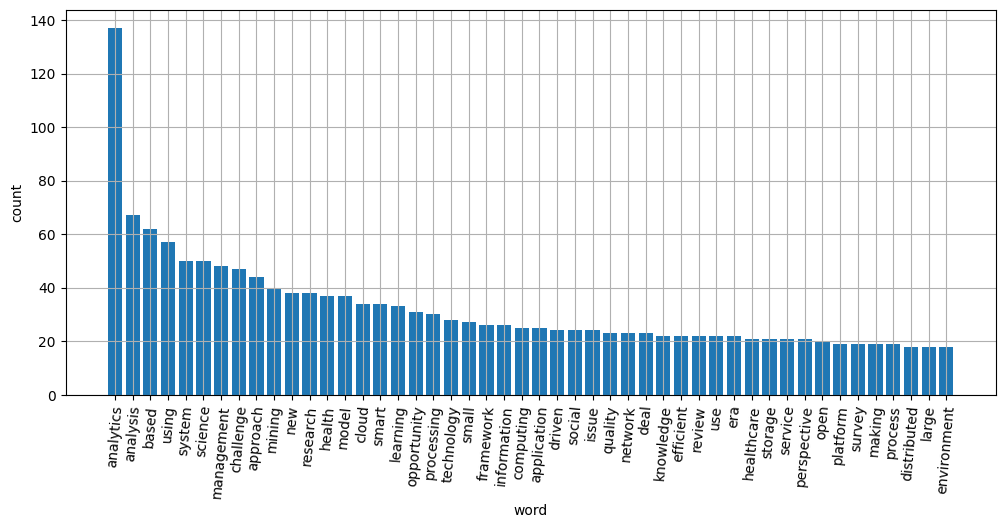

In [37]:
# 히스토그램 표시 옵션 
plt.figure(figsize=(12,5))
plt.xlabel("word")
plt.ylabel("count")
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
#plt.xticks(눈금을 적용할 x축의 실제 위치, 해당 위치에 나타낼 값)
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 85)

plt.show()

# 3. 분석 모델 구축 및 결과 시각화

## 3-1. 연도별 데이터 수

In [38]:
all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index=False)['doc_count'].count()
summary_year  #출력하여 내용 확인

,출판일,doc_count
0,1994,1
1,1995,1
2,1996,1
3,1998,3
4,2002,4
5,2003,1
6,2004,3
7,2005,3
8,2007,2
9,2008,3


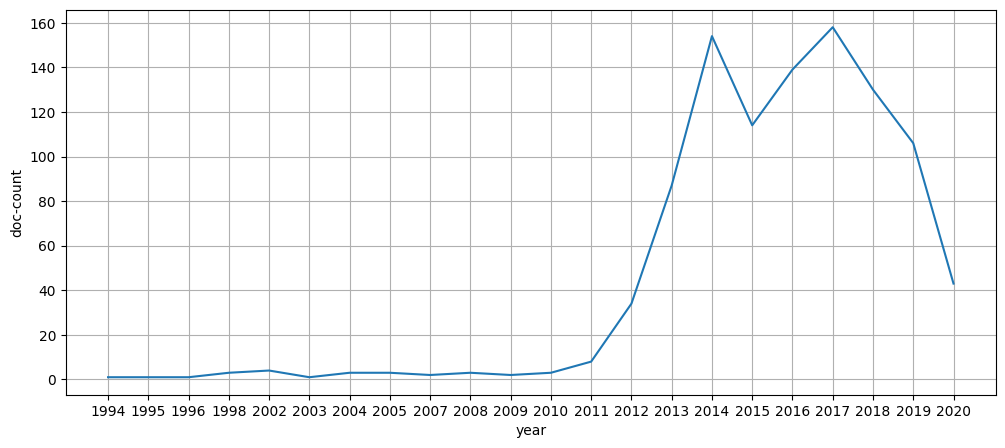

In [39]:
plt.figure(figsize=(12,5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)

plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])

plt.show()

## 3-2. 워드클라우드

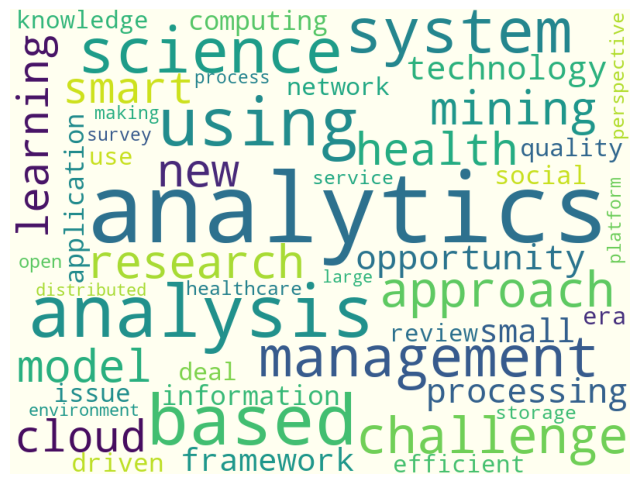

In [40]:
stopwords=set(STOPWORDS)
wc=WordCloud(background_color='ivory', stopwords=stopwords, width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)  # 빈도수를 지정하여 객체에 담은 

plt.figure(figsize=(8,8))  # 크기
plt.imshow(cloud)   # 색으로 채워서 그림을 만들 수 있는 plt.imshow 함수
plt.axis('off')   # 축을 지우기 위해 plt.axis() 함수
plt.show()

#### - 워드 클라우드에 나타나는 단어의 위치는 실행 할 때마다 달라진다. ☺

In [42]:
cloud.to_file("riss_bigdata_wordCloud.jpg")